In [13]:
# Clustering Analysis test for Draftkings Fantasy NBA League

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load master DF with all players
df = pd.read_csv("DKSalaries.csv")
df.head()

,Position,Name + ID,Name,ID,Roster Position,Salary,Game Info,TeamAbbrev,AvgPointsPerGame
0,PG/SF,Luka Doncic (15235137),Luka Doncic,15235137,PG/SF/F/G/UTIL,11200,LAC@DAL 08/30/2020 03:30PM ET,DAL,57.49
1,SF,Kawhi Leonard (15235142),Kawhi Leonard,15235142,SF/F/UTIL,10100,LAC@DAL 08/30/2020 03:30PM ET,LAC,48.89
2,PG/SG,Donovan Mitchell (15235145),Donovan Mitchell,15235145,PG/SG/G/UTIL,9700,DEN@UTA 08/30/2020 08:30PM ET,UTA,39.30
3,C,Nikola Jokic (15235149),Nikola Jokic,15235149,C/UTIL,9500,DEN@UTA 08/30/2020 08:30PM ET,DEN,46.60
4,SF/PF,Jayson Tatum (15235151),Jayson Tatum,15235151,SF/PF/F/UTIL,9200,BOS@TOR 08/30/2020 01:00PM ET,BOS,42.23


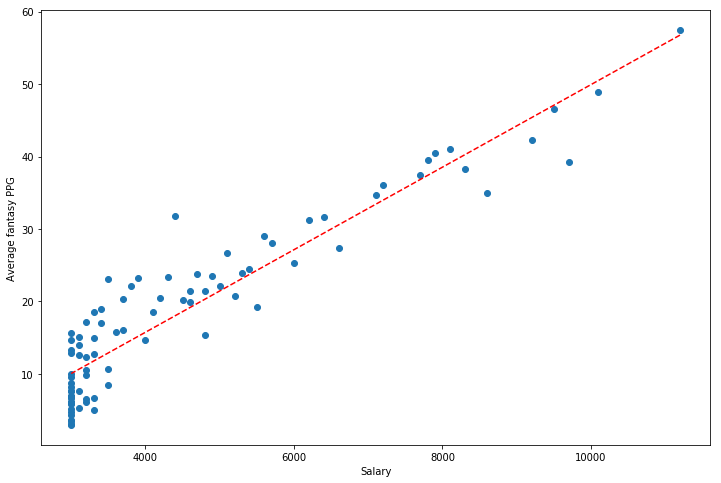

In [11]:
# plot trend line and players to find outliers

plt.rcParams['figure.figsize'] = [12, 8]
fig, ax = plt.subplots()
x = df["Salary"]
y = df["AvgPointsPerGame"]
ax.scatter(x, y)
plt.xlabel("Salary")
plt.ylabel("Average fantasy PPG")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

opt_dict = {}

plt.show()

In [12]:
# Find outlier names based on requirements 

for i, txt in enumerate(df["Name"]):
    #if(df.iloc[i]["AvgPointsPerGame"] > 30 and df.iloc[i]["Salary"] < 6000):
        #ax.annotate(txt, (df.iloc[i]["Salary"]+50, df.iloc[i]["AvgPointsPerGame"]+1))
    if(df.iloc[i]["AvgPointsPerGame"] - p(df.iloc[i]["Salary"]) > 5):
        ax.annotate(txt, (df.iloc[i]["Salary"], df.iloc[i]["AvgPointsPerGame"]+1))
        opt_dict[df.iloc[i]["Name"]] = str(df.iloc[i]["AvgPointsPerGame"]) + "@" + str(df.iloc[i]["Salary"])
        
for key,val in enumerate(opt_dict):
    print(val + ": " + opt_dict[val])

Montrezl Harrell: 31.77@4400
Daniel Theis: 23.43@4300
Marc Gasol: 23.17@3900
Reggie Jackson: 22.1@3800
Enes Kanter: 20.37@3700
Patrick Beverley: 23.14@3500
Delon Wright: 18.97@3400
Mason Plumlee: 18.56@3300
JaMychal Green: 17.13@3200
J.J. Barea: 15.66@3000
